In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
Image_train_Data = pd.read_csv('../Desktop/Python/DATASET/Hand Sign Data train.csv')
Image_test_Data = pd.read_csv('../Desktop/Python/DATASET/Hand Sign Data test.csv')

In [200]:
Image_train_Data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [201]:
Image_train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [202]:
Image_test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [203]:
Image_train_Data.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [204]:
Image_train_Data.shape

(27455, 785)

In [205]:
Image_train_Data['label']

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [206]:
Image_train_Data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [207]:
labels = Image_train_Data['label'].values

In [208]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

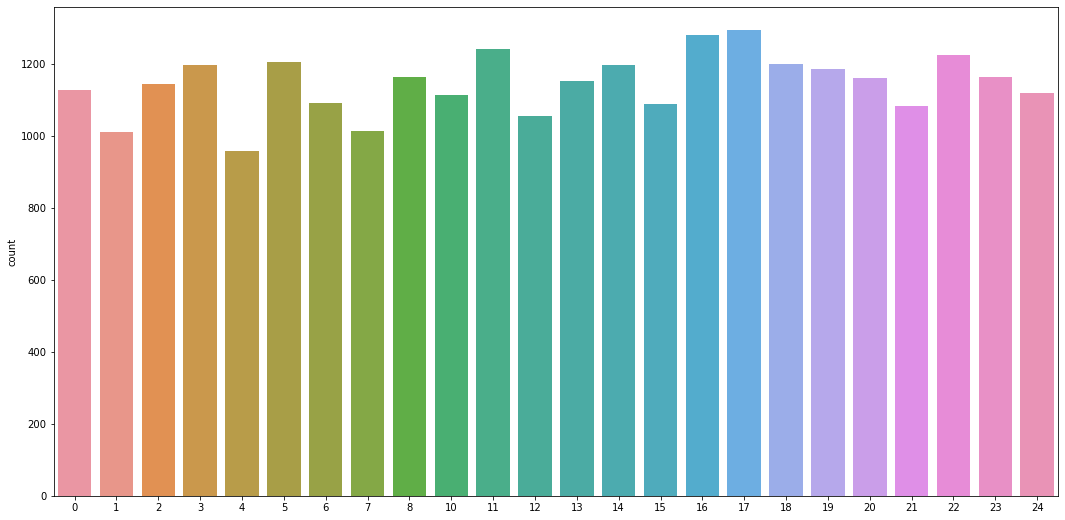

In [209]:
plt.figure(figsize=(18,9))
sns.countplot(x = labels)

In [210]:
Image_train_Data.drop('label' , axis= 1 ,inplace=True)

In [211]:
Images = Image_train_Data.values
Images = np.array([np.reshape(i,(28,28)) for i in Images])
Images = np.array([i.flatten() for i in Images])

In [212]:
from sklearn.preprocessing import LabelBinarizer

label_binerizer = LabelBinarizer()
labels = label_binerizer.fit_transform(labels)

In [213]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [214]:
len(labels[0])

24

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


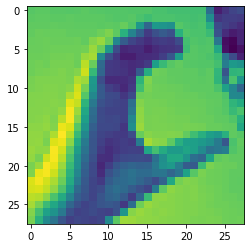

In [215]:
index = 2
print(labels[index])
plt.imshow(Images[index].reshape(28,28))

In [216]:
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0 , len(Images))
    Input_im = Images[rand]
    
    sample = Input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None , fx = 10 , fy =10 , interpolation = cv2.INTER_CUBIC)
    cv2.imshow('sample image' , sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()   

In [217]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(Images, labels , test_size= 0.3 , random_state=10) 

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [219]:
x_train = x_train / 255
x_test = x_test / 255

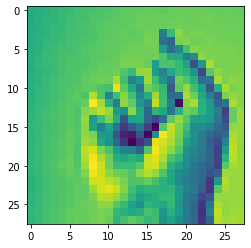

In [220]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [221]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu' , input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3) ,activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes , activation= 'softmax'))

In [222]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(),
              metrics=['accuracy'] )

In [223]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)        

In [224]:
 history= model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 12s 76ms/step - loss: 2.6466 - accuracy: 0.1783 - val_loss: 1.7143 - val_accuracy: 0.4768
Epoch 2/10
151/151 [==============================] - 11s 71ms/step - loss: 1.3485 - accuracy: 0.5420 - val_loss: 0.8943 - val_accuracy: 0.7027
Epoch 3/10
151/151 [==============================] - 12s 78ms/step - loss: 0.8075 - accuracy: 0.7222 - val_loss: 0.6458 - val_accuracy: 0.7969
Epoch 4/10
151/151 [==============================] - 11s 74ms/step - loss: 0.5457 - accuracy: 0.8128 - val_loss: 0.3494 - val_accuracy: 0.8954
Epoch 5/10
151/151 [==============================] - 11s 73ms/step - loss: 0.3646 - accuracy: 0.8773 - val_loss: 0.2341 - val_accuracy: 0.9344
Epoch 6/10
151/151 [==============================] - 11s 71ms/step - loss: 0.2561 - accuracy: 0.9154 - val_loss: 0.1519 - val_accuracy: 0.9601
Epoch 7/10
151/151 [==============================] - 11s 71ms/step - loss: 0.1901 - accuracy: 0.9392 - val_loss: 0.1058 - val_accuracy:

In [180]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size= batch_size)

Epoch 1/10
151/151 [==============================] - 11s 73ms/step - loss: 0.0402 - accuracy: 0.9896 - val_loss: 0.0100 - val_accuracy: 0.9995
Epoch 2/10
151/151 [==============================] - 11s 73ms/step - loss: 0.0345 - accuracy: 0.9908 - val_loss: 0.0107 - val_accuracy: 0.9993
Epoch 3/10
151/151 [==============================] - 11s 71ms/step - loss: 0.0274 - accuracy: 0.9932 - val_loss: 0.0189 - val_accuracy: 0.9938
Epoch 4/10
151/151 [==============================] - 11s 70ms/step - loss: 0.0288 - accuracy: 0.9924 - val_loss: 0.0122 - val_accuracy: 0.9984
Epoch 5/10
151/151 [==============================] - 11s 70ms/step - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.0036 - val_accuracy: 0.9999
Epoch 6/10
151/151 [==============================] - 11s 70ms/step - loss: 0.0209 - accuracy: 0.9943 - val_loss: 0.0049 - val_accuracy: 0.9995
Epoch 7/10
151/151 [==============================] - 11s 71ms/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 0.0042 - val_accuracy:

In [225]:
model.save('sign_mnist_cnn_50_epochs.h5')
print('Model Saved')

Model Saved


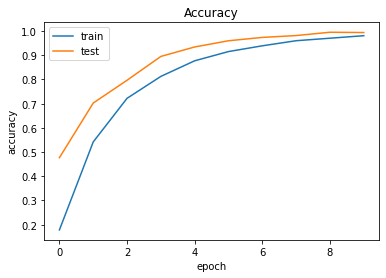

In [226]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [227]:
Image_test_Data.sample(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6309,14,183,188,192,196,200,203,205,207,211,...,146,186,244,241,242,241,239,238,236,234
106,15,132,131,129,82,132,102,27,72,82,...,72,68,65,12,31,29,20,15,16,11
1601,15,72,71,73,72,77,78,79,82,84,...,92,90,91,90,91,93,91,94,127,102


In [228]:
Image_test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [229]:
Image_test_Data.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222


In [230]:
Image_test_Data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [231]:
Image_test_Data.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [232]:
Image_test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [233]:
Image_test_Data['pixel20']

0       153
1       139
2       184
3       209
4       181
       ... 
7167    175
7168    178
7169    189
7170    240
7171    172
Name: pixel20, Length: 7172, dtype: int64

In [234]:
Image_test_Data['pixel150']

0       154
1       153
2       162
3       181
4       216
       ... 
7167    183
7168    184
7169    160
7170    206
7171    143
Name: pixel150, Length: 7172, dtype: int64

In [236]:
test_labels = Image_test_Data['label']
Image_test_Data.drop('label', axis=1, inplace=True )

test_images = Image_test_Data.values
test_images = np.array([np.reshape(i, (1000,500)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binerizer.fit_transform(test_labels)

test_labels = test_images.reshape(test_images.shape[0], 28,28,1)

test_images.shape

y_pred = model.predict(Image_test_Data_images)

KeyError: 'label'